In [1]:
import pandas as pd
import seaborn as sns
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import json

with open('../data/all_filters.json', 'r') as JSON:
    json_dict = json.load(JSON)
data = json.loads(json_dict)    

In [3]:
data.keys()

dict_keys(['Image_index', 'Filter_name', 'Filter_parameter', 'ROC'])

### Calculating AUC of ROC's

In [15]:
curves = np.array(data['ROC']['array'])
curves.shape

(200, 2, 21, 155)

In [16]:
sg_eff = curves[range(0,200,2),0,:,:]
bg_eff = curves[range(0,200,2),1,:,:]

In [53]:
sg_eff_mean, bg_eff_mean = sg_eff.mean(axis = 0), bg_eff.mean(axis = 0)
sg_eff_std, bg_eff_std = sg_eff.std(axis = 0), bg_eff.std(axis = 0)

In [7]:
names = data['Filter_name'][0:155]
params = data['Filter_parameter'][0:155]

In [73]:
auc_mean = (abs(np.diff(sg_eff_mean, axis = 0))*bg_eff_mean[1:,:]).sum(axis = 0)
print(names[auc_mean.argmax()] + ' - ' + 'params' + str(params[auc_mean.argmax()]))

f1_scores = ((2*sg_eff_mean*bg_eff_mean)/(sg_eff_mean+bg_eff_mean)).max(axis=0)

nlmeans - params[1, 11]


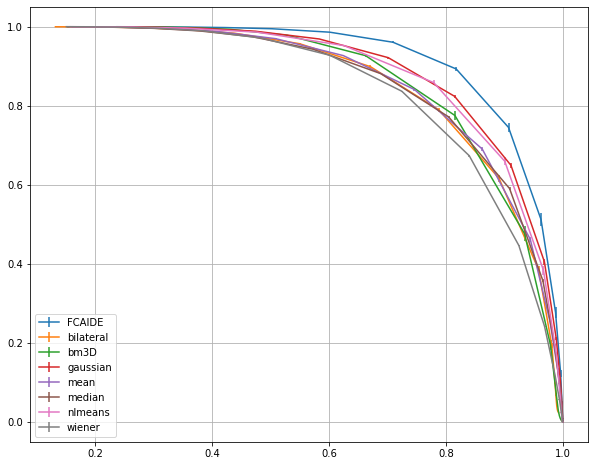

In [75]:
plt.figure(figsize = (10,8))
for filter_name in np.unique(names):
    index = np.where(filter_name == np.array(names))[0]
    #print(auc_mean[index].max())
    #print('\n' + str(index[auc_mean[index].argmax()]))
    #x = sg_eff_mean[:, index]
    #y = bg_eff_mean[:,index]
    #best_index = index[auc_mean[index].argmax()]
    best_index = index[f1_scores[index].argmax()]
    plt.errorbar(sg_eff_mean[:, best_index], 
                 bg_eff_mean[:, best_index],
                 yerr = bg_eff_std[:, best_index]/np.sqrt(100),
                 label = names[best_index])
    
plt.grid()
plt.legend()    